In [1]:
# Relevant packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as dt
import scipy.io as sio
import datetime

In [2]:
"""
Each cell must be read carefully and run
in order to generate the correct results and 
for customization to a particular fire. 
"""

'\nEach cell must be read carefully and run\nin order to generate the correct results and \nfor customization to a particular fire. \n'

In [3]:
# date - to be changed accordingly
dateNum = 3 #date number corresponds to the day number

In [4]:
# Change path to lidar data accordingly
lidar_path = "../lidar_data/lidar-data-"+str(dateNum)+"-Aug.csv" # CHANGE ACCORDINGLY

In [5]:
# reading in the lidar data
lidar = pd.read_csv(lidar_path)
lidar = lidar.drop("Unnamed: 0", axis=1) # drop extra column

lidar # check the lidar data

,Midtime,Latitude,Longitude,Fire ID,Pass #,MLH,Plume Height,MLH Estimate
0,78247.007,47.972,-116.836,10.0,1.0,2143.3048,-9999.0,2850.8139
1,78257.007,47.986,-116.855,10.0,1.0,2712.9095,-9999.0,2850.8139
2,78267.503,48.001,-116.876,10.0,1.0,2802.8473,-9999.0,2850.8139
3,78277.504,48.015,-116.895,10.0,1.0,3042.6808,-9999.0,2850.8139
4,78287.504,48.028,-116.915,10.0,1.0,3102.6393,-9999.0,2850.8139
...,...,...,...,...,...,...,...,...
1631,95231.503,48.461,-117.760,10.0,2.0,3012.7015,-9999.0,3069.1330
1632,95241.503,48.474,-117.761,10.0,2.0,2982.7224,-9999.0,3069.1330
1633,95252.007,48.487,-117.761,10.0,2.0,3012.7015,-9999.0,3069.1330
1634,95262.007,48.499,-117.761,10.0,2.0,3072.6600,-9999.0,3069.1330


In [6]:
# convert the times to datetime
times = np.array(lidar["Midtime"])

# Comment out for the day you want!
unixtime = 1564790400 # 3 Aug 2019
# unixtime = 1565049600 # 6 August 2019 UTC
# unixtime = 1565136000 # 7 August 2019 UTC

tdelta = np.full(len(times), unixtime) # unixtime seconds from 1 Jan 1970 to 2 Aug 2019

pst_convert = np.full(len(times), 7*60*60) # subtract from utc to get pst

lidartimes = times + tdelta - pst_convert
lidartimes = np.array(lidartimes, dtype="datetime64[s]")

# checking all times
lidartimes

array(['2019-08-03T14:44:07', '2019-08-03T14:44:17',
       '2019-08-03T14:44:27', ..., '2019-08-03T19:27:32',
       '2019-08-03T19:27:42', '2019-08-03T19:27:52'],
      dtype='datetime64[s]')

In [7]:
# Creating an array of lidar injection heights
# within the pre-determined grid

# array of lidar heights
lidarheights = np.array([])

Nh = len(lidartimes) # number of heights 

# Extracting the lidar heights within range   
lheights = lidar["Plume Height"]
    
# appending the lidar heights to array
for h in lheights:
    if float(h) < 0:
        lidarheights = np.append(lidarheights, np.NaN)
    else:
        lidarheights = np.append(lidarheights, float(h))
        
# keeping heights within pre-determined grid box only
for i, h in enumerate(lidarheights):
    if h != np.NaN:
        # check if the height is within the pre-determined grid
        if lidar["Latitude"][i] > 47.85 and lidar["Latitude"][i] < 48.06:
            if lidar["Longitude"][i] > -118.72 and lidar["Longitude"][i] < -118.30:
                lidarheights[i] = h
            else:
                lidarheights[i] = np.NaN
        else:
            lidarheights[i] = np.NaN

In [8]:
# creating dictionary of lidar heights for comparison
"""
Suppose the hour number, hnum = x. 
Injection heights between (x-1):30:00 and x:30:00 will
be mapped to hour x
"""
lidar_heights = {} # empty dict

daystr = "2019-08-0"+str(dateNum)+"T" # day string
hnum = 0
temparr = np.array([]) # temp array

for t in range(len(lidartimes)):
    
    if hnum >= 24: 
        break
    else:
        timestr = daystr+"0"+str(hnum)+":30:00"
        if hnum > 9:
            timestr = daystr + str(hnum)+":30:00"
            
    if lidartimes[t] < np.datetime64(timestr):
        temparr = np.append(temparr, t)
    else:
        lidar_heights[hnum] = temparr
        hnum += 1
        temparr = np.array([]) # reset for next hour
        
lidar_heights[hnum] = temparr

In [9]:
lidar_heights # checking the dictionary

{0: array([], dtype=float64),
 1: array([], dtype=float64),
 2: array([], dtype=float64),
 3: array([], dtype=float64),
 4: array([], dtype=float64),
 5: array([], dtype=float64),
 6: array([], dtype=float64),
 7: array([], dtype=float64),
 8: array([], dtype=float64),
 9: array([], dtype=float64),
 10: array([], dtype=float64),
 11: array([], dtype=float64),
 12: array([], dtype=float64),
 13: array([], dtype=float64),
 14: array([], dtype=float64),
 15: array([ 15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,
         26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
         37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
         48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
         59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
         70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
         81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,
         92.,  93.,  94

In [10]:
# Load in the radar heights for the corresponding day
import scipy.io as sio

# change the file path accordingly
# E.g., for 3 August PST, you will need to read in 3 Aug 2019 UTC and 4 Aug 2019 UTC
path_first = "../Injection-Heights/new-injection-heights_"+str(dateNum)+"-Aug-2019.mat"
path_second = "../Injection-Heights/new-injection-heights_"+str(dateNum+1)+"-Aug-2019.mat"

f = sio.loadmat(path_first)

In [11]:
# retrieving the times for the first day (UTC)
times = np.array(f["time"][0])

# Comment out each of the unixtimes according to the day you want!!!
unixtime = 1564790400 # 3 August 2019 UTC
# unixtime = 1564876800 # 4 August 2019 UTC
# unixtime = 1565049600 # 6 August 2019 UTC
# unixtime = 1565136000 # 7 August 2019 UTC
# unixtime = 1565222400 # 8 August 2019 UTC

tdelta = np.full(len(times), unixtime) # unixtime seconds from 1 Jan 1970 to given day
pst_convert = np.full(len(times), 7*60*60)

radartimes = times + tdelta - pst_convert
radartimes = np.array(radartimes, dtype="datetime64[s]")

In [12]:
radartimes # check

array(['2019-08-02T17:00:47', '2019-08-02T17:05:07',
       '2019-08-02T17:09:29', '2019-08-02T17:13:51',
       '2019-08-02T17:18:12', '2019-08-02T17:22:34',
       '2019-08-02T17:26:56', '2019-08-02T17:31:16',
       '2019-08-02T17:35:37', '2019-08-02T17:39:58',
       '2019-08-02T17:44:29', '2019-08-02T17:48:59',
       '2019-08-02T17:53:24', '2019-08-02T17:57:53',
       '2019-08-02T18:02:24', '2019-08-02T18:06:55',
       '2019-08-02T18:11:21', '2019-08-02T18:15:48',
       '2019-08-02T18:20:14', '2019-08-02T18:24:39',
       '2019-08-02T18:29:05', '2019-08-02T18:33:32',
       '2019-08-02T18:38:04', '2019-08-02T18:42:29',
       '2019-08-02T18:46:56', '2019-08-02T18:51:21',
       '2019-08-02T18:55:46', '2019-08-02T19:00:12',
       '2019-08-02T19:04:37', '2019-08-02T19:09:07',
       '2019-08-02T19:13:33', '2019-08-02T19:17:59',
       '2019-08-02T19:22:26', '2019-08-02T19:26:52',
       '2019-08-02T19:31:17', '2019-08-02T19:35:42',
       '2019-08-02T19:40:03', '2019-08-02T19:4

In [13]:
fnext = sio.loadmat(path_second)
# retrieving the times for the second day (UTC)
times = np.array(fnext["time"][0])

# Comment out each of the unixtimes according to the day you want!!!
# unixtime = 1564790400 # 3 August 2019 UTC
unixtime = 1564876800 # 4 August 2019 UTC
# unixtime = 1565049600 # 6 August 2019 UTC
# unixtime = 1565136000 # 7 August 2019 UTC
# unixtime = 1565222400 # 8 August 2019 UTC

tdelta = np.full(len(times), unixtime) # unixtime seconds from 1 Jan 1970 to given day
pst_convert = np.full(len(times), 7*60*60)

radartimes_next = times + tdelta - pst_convert
radartimes_next = np.array(radartimes_next, dtype="datetime64[s]")

# check radartimes of the next day (UTC)
radartimes_next

array(['2019-08-03T17:06:17', '2019-08-03T17:13:26',
       '2019-08-03T17:20:34', '2019-08-03T17:27:43',
       '2019-08-03T17:34:45', '2019-08-03T17:41:49',
       '2019-08-03T17:48:57', '2019-08-03T17:56:06',
       '2019-08-03T18:03:17', '2019-08-03T18:10:27',
       '2019-08-03T18:17:29', '2019-08-03T18:24:38',
       '2019-08-03T18:31:47', '2019-08-03T18:38:57',
       '2019-08-03T18:46:07', '2019-08-03T18:53:16',
       '2019-08-03T19:00:19', '2019-08-03T19:07:22',
       '2019-08-03T19:14:25', '2019-08-03T19:21:34',
       '2019-08-03T19:28:36', '2019-08-03T19:35:46',
       '2019-08-03T19:42:56', '2019-08-03T19:50:05',
       '2019-08-03T19:57:14', '2019-08-03T20:04:23',
       '2019-08-03T20:11:32', '2019-08-03T20:18:43',
       '2019-08-03T20:25:51', '2019-08-03T20:33:01',
       '2019-08-03T20:40:09', '2019-08-03T20:47:19',
       '2019-08-03T20:54:28', '2019-08-03T21:01:37',
       '2019-08-03T21:08:46', '2019-08-03T21:15:55',
       '2019-08-03T21:23:03', '2019-08-03T21:3

In [14]:
# combining both the radar times arrays
radartimes = np.append(radartimes, radartimes_next)

# check
radartimes

array(['2019-08-02T17:00:47', '2019-08-02T17:05:07',
       '2019-08-02T17:09:29', '2019-08-02T17:13:51',
       '2019-08-02T17:18:12', '2019-08-02T17:22:34',
       '2019-08-02T17:26:56', '2019-08-02T17:31:16',
       '2019-08-02T17:35:37', '2019-08-02T17:39:58',
       '2019-08-02T17:44:29', '2019-08-02T17:48:59',
       '2019-08-02T17:53:24', '2019-08-02T17:57:53',
       '2019-08-02T18:02:24', '2019-08-02T18:06:55',
       '2019-08-02T18:11:21', '2019-08-02T18:15:48',
       '2019-08-02T18:20:14', '2019-08-02T18:24:39',
       '2019-08-02T18:29:05', '2019-08-02T18:33:32',
       '2019-08-02T18:38:04', '2019-08-02T18:42:29',
       '2019-08-02T18:46:56', '2019-08-02T18:51:21',
       '2019-08-02T18:55:46', '2019-08-02T19:00:12',
       '2019-08-02T19:04:37', '2019-08-02T19:09:07',
       '2019-08-02T19:13:33', '2019-08-02T19:17:59',
       '2019-08-02T19:22:26', '2019-08-02T19:26:52',
       '2019-08-02T19:31:17', '2019-08-02T19:35:42',
       '2019-08-02T19:40:03', '2019-08-02T19:4

In [15]:
# combining the smoke injection height arrays
xdim, ydim, T = f['smoke_injection_height'].shape

xdim, ydim, T # checking dimensions

(26, 19, 256)

In [16]:
# Adding all radar-derived heights to a list

Nr = len(radartimes) # number of radar times

# Note that 26x19 is the dimension of the grid box
# we will populate the injection heights into this array 
arr = np.zeros(Nr*26*19).reshape(Nr, 26*19)

for t in range(Nr):
    count = 0 # grid square count/number
    
    if t < T:    
        for x in range(26):
            for y in range(19):

                if f['smoke_injection_height'][x, y, t] <= 0:
                    arr[t, count] = np.NaN
                else:
                    arr[t, count] = f['smoke_injection_height'][x, y, t]

                count += 1
    else:
        for x in range(26):
            for y in range(19):
                
                tnext = t-T
                
                if fnext['smoke_injection_height'][x, y, tnext] <= 0:
                    arr[t, count] = np.NaN
                else:
                    arr[t, count] = fnext['smoke_injection_height'][x, y, tnext]

                count += 1

In [17]:
arr.shape # check 

(457, 494)

In [18]:
# Removing all the NaN values

newarr = [] # new array
for i in range(Nr):
    # remove the NaN values from arr
    a_list = list(arr[i][~np.isnan(arr[i])])
    newarr.append(a_list)

In [19]:
# We need to get rid of the heights and times 

In [20]:
# putting radar heights into a dictionary
radarheights = {}

daystr = "2019-08-0"+str(dateNum)+"T"
hnum = 0 # hour number
temparr = np.array([])

for t in range(Nr):
    
    # if date == 2 Aug 2019 UTC, skip
    if radartimes[t] < np.datetime64(daystr+"00:00:00"):
        continue
    # if date == 4 Aug 2019 UTC, skip
    if radartimes[t] > np.datetime64(daystr+"23:59:59"):
        continue
    
    if hnum >= 24:
        # if hour number == 24, next day        
        break
    else:
        timestr = daystr+"0"+str(hnum)+":30:00"
        if hnum > 9:
            timestr = daystr + str(hnum)+":30:00"
            
    if radartimes[t] < np.datetime64(timestr):
        temparr = np.append(temparr, t)
    else:
        radarheights[hnum] = temparr
        hnum += 1
        temparr = np.array([]) # reset for next hour
        
radarheights[hnum] = temparr

In [21]:
radarheights # check

{0: array([92., 93., 94., 95., 96., 97., 98.]),
 1: array([100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.]),
 2: array([112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122.,
        123.]),
 3: array([125., 126., 127., 128., 129., 130., 131., 132., 133., 134., 135.,
        136.]),
 4: array([138., 139., 140., 141., 142., 143., 144., 145., 146., 147., 148.,
        149.]),
 5: array([151., 152., 153., 154., 155., 156., 157., 158., 159.]),
 6: array([161., 162., 163., 164., 165., 166., 167., 168.]),
 7: array([170., 171., 172., 173., 174., 175., 176.]),
 8: array([178., 179., 180., 181., 182., 183.]),
 9: array([185., 186., 187., 188., 189., 190., 191., 192.]),
 10: array([194., 195., 196., 197., 198., 199., 200.]),
 11: array([202., 203., 204., 205., 206., 207., 208.]),
 12: array([210., 211., 212., 213., 214., 215., 216., 217.]),
 13: array([219., 220., 221., 222., 223., 224., 225.]),
 14: array([227., 228., 229., 230., 231., 232., 233., 234.]),
 15: arra

In [22]:
# retrieving the height according the file numbers in 
# the dictionary

heights_list = []

for hour in radarheights.keys():
    temp_list = np.array([])
    
    if hour == 0:
        continue
    
    for i in radarheights[hour].astype(int):
        temp_list = np.append(temp_list, newarr[i])
        
        if hour == 24:
            for j in radarheights[0].astype(int):
                temp_list = np.append(temp_list, newarr[j])
                
    heights_list.append(temp_list)

In [24]:
# Lidar Heights List using the lidar dictionary
lidar_heights_list = []

for hour in lidar_heights.keys():
    temp = np.array([])
    
    if hour == 0:
        continue
        
    for i in lidar_heights[hour].astype(int):
        temp = np.append(temp, lidarheights[i])
        
        if hour == 24:
            for j in lidar_heights[0].astype(int):
                temp = np.append(temp, lidarheights[j])
                
    lidar_heights_list.append(temp)

In [25]:
# Removing the NaN values from lidar heights
lidarHeights = []
for i in range(len(lidar_heights_list)):
    templh = list(lidar_heights_list[i][~np.isnan(lidar_heights_list[i])])
    lidarHeights.append(templh)

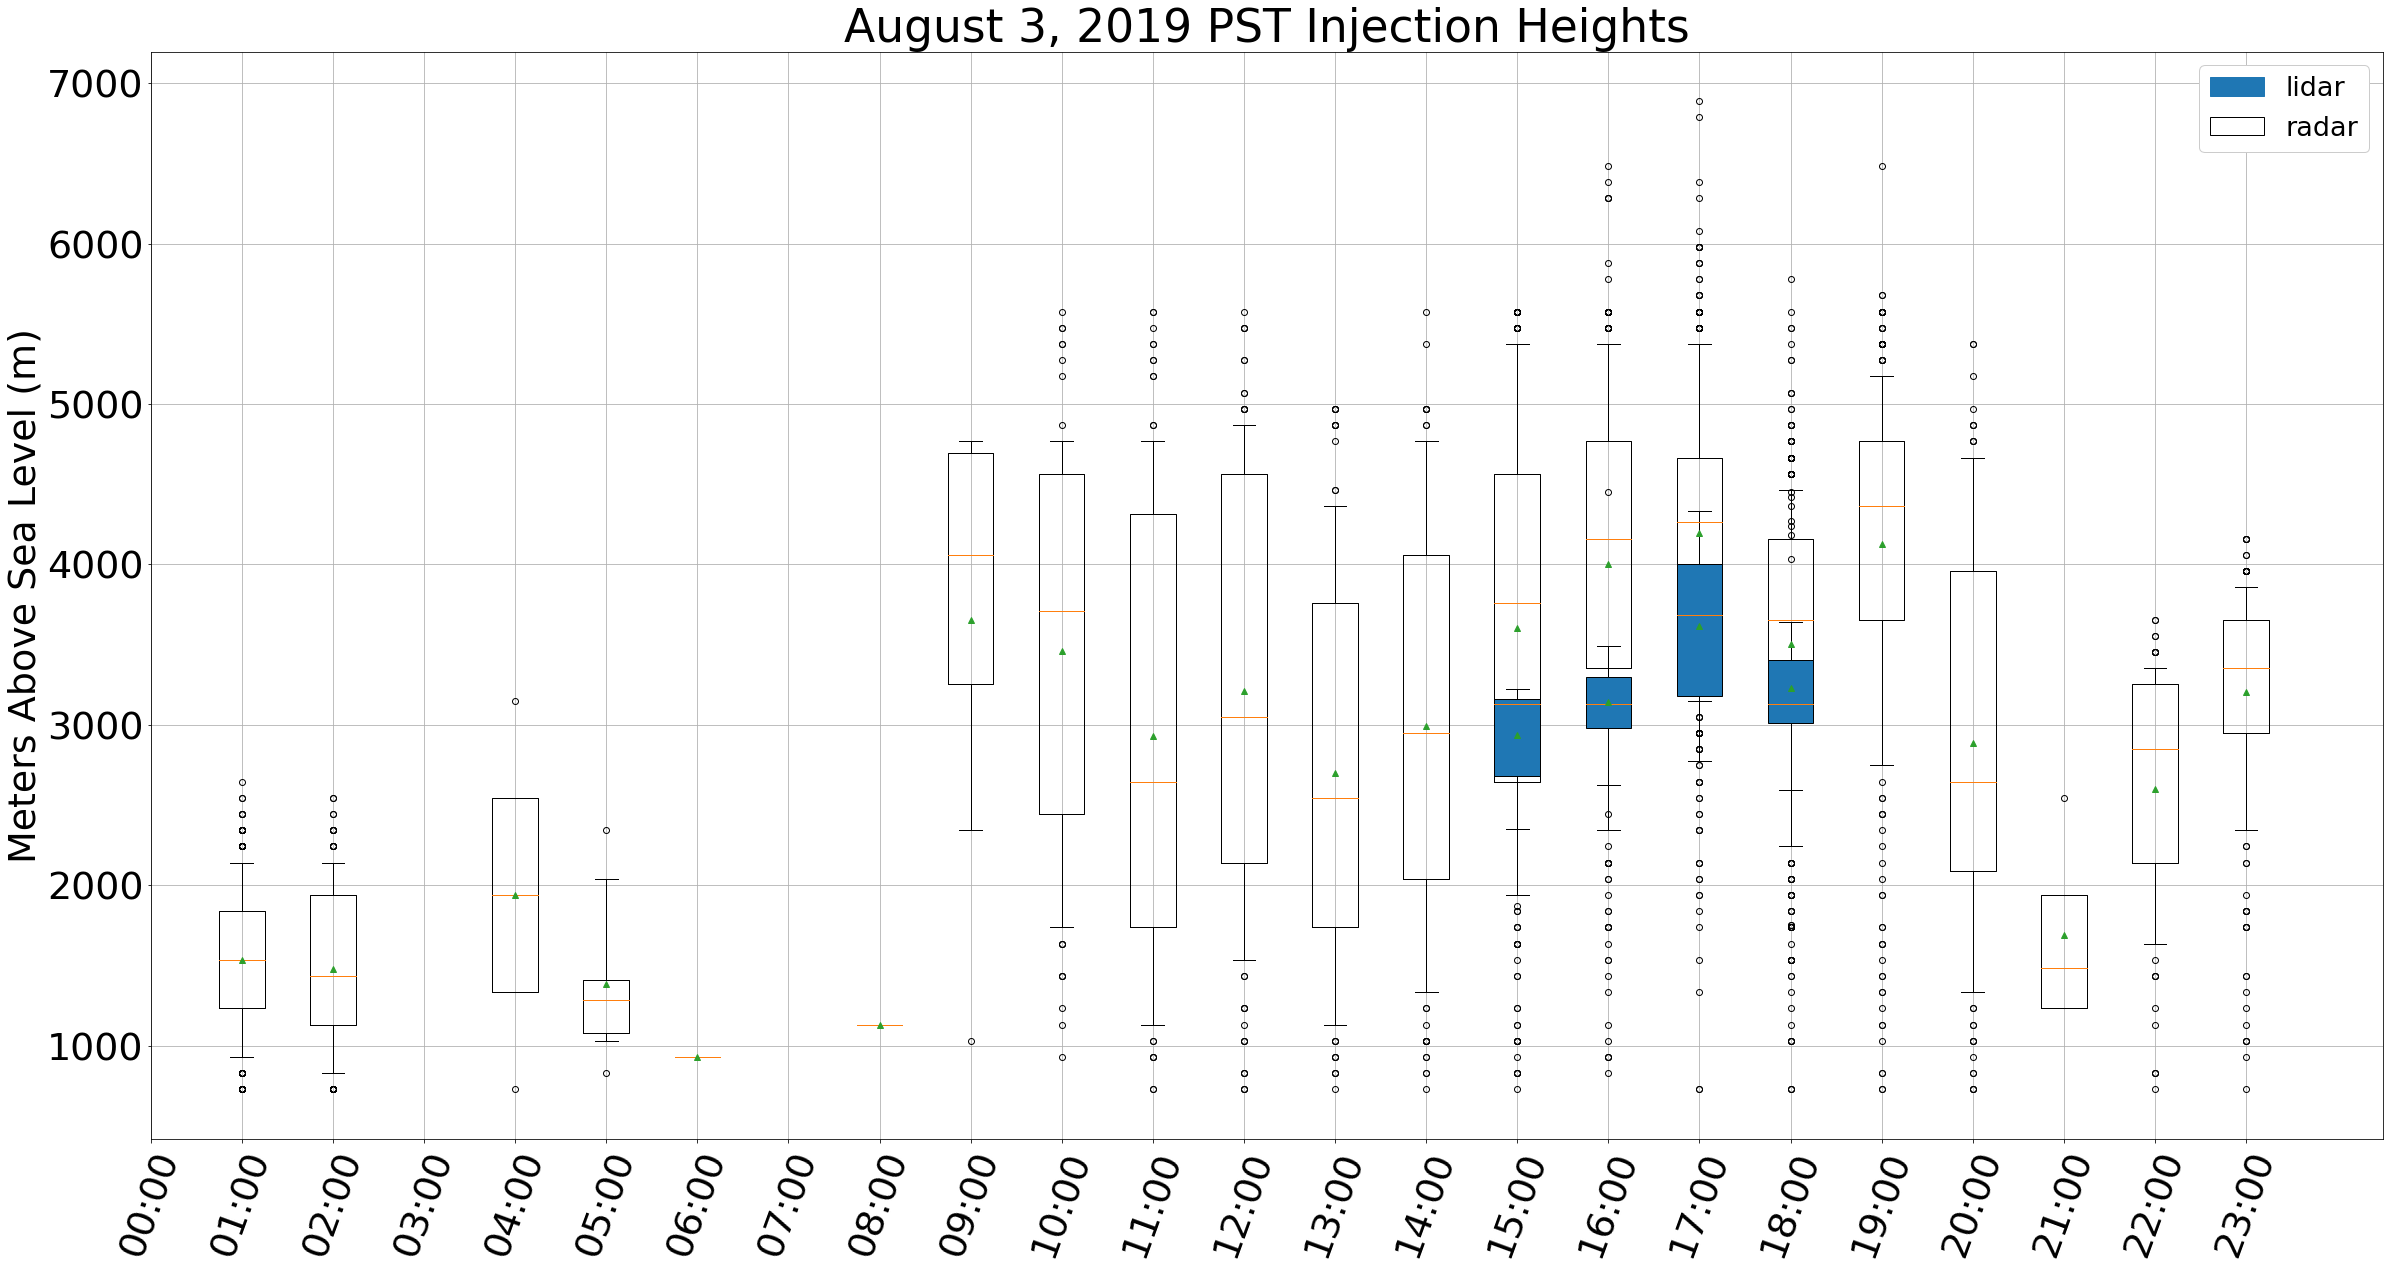

In [27]:
plt.rcParams.update({'font.size': 38}); # fontsize

import matplotlib.patches as mpatches

colorList = ['tab:blue', 'white']
labelNames = ['lidar', 'radar']

label_0 = mpatches.Patch(color=colorList[0], label=labelNames[0])
label_1 = mpatches.Patch(color=colorList[1], label=labelNames[1])
mpatches.Patch.set_edgecolor(label_1, color="black")
# label_2 = mpatches.Patch(color=colorList[1], label=labelNames[1])
# label_3 = mpatches.Patch(color=colorList[2], label=labelNames[2])


plt.figure(figsize=(40, 20))
plt.boxplot(heights_list, whis=[10, 90], widths = 0.5, showmeans=True) # radar heights
plt.boxplot(lidarHeights, whis=1.5, widths = 0.5, showmeans=True, patch_artist=True) # lidar heights
# plt.boxplot(heights_list, widths = 0.5, showmeans=True)
# plt.boxplot(lidarHeights, widths = 0.5, showmeans=True, patch_artist=True)
#plt.plot(lidartimes, lidarheights)

plt.grid()
time = [f"0{h}:00" for h in range(0, 10)] + [f"{h}:00" for h in range(10, 24)]

plt.xticks(np.arange(24), time)
plt.xticks(rotation = 70)
plt.title("August "+str(dateNum)+", 2019 PST Injection Heights")
plt.ylabel("Meters Above Sea Level (m)")
plt.legend(handles=[label_0, label_1], framealpha=True, fontsize=27,loc='upper right')

# plt.savefig('aug3_boxplot.png')

### Max values, Mean values, Median values

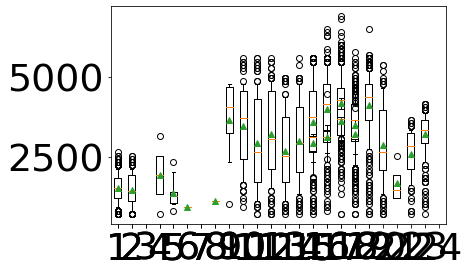

In [28]:
rbp = plt.boxplot(heights_list, whis=[10, 90], widths = 0.5, showmeans=True)
lbp = plt.boxplot(lidarHeights, whis=1.5, widths = 0.5, showmeans=True)

In [29]:
rbp.keys() # finding the keys of the dictionaries

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

In [30]:
# Indexes, change according to the day
# e.g., for Aug 3, indexes = 14 to 18
begin = 14
end = 18

In [31]:
# max values

for i in range(begin, end):
    print('radar max', i, np.round(np.percentile(np.asarray(heights_list[i]), 90), -1))
#     print(np.round(np.percentile(np.asarray(heights_list[i]), 90), -1))
    print('lidar max', i, np.round(np.percentile(np.asarray(lidarHeights[i]), 90), -1))
#     print(np.round(np.percentile(np.asarray(lidarHeights[i]), 90), -1))
    print("-----")

radar max 14 5370.0
lidar max 14 3170.0
-----
radar max 15 5390.0
lidar max 15 3440.0
-----
radar max 16 5370.0
lidar max 16 4120.0
-----
radar max 17 4460.0
lidar max 17 4190.0
-----


In [32]:
# radar mean values
mean = [m.get_ydata() for m in rbp['means']]
np.round(mean[begin:end], -1)

array([[3610.],
       [4010.],
       [4200.],
       [3500.]])

In [33]:
# lidar mean values
lmean = [m.get_ydata() for m in lbp['means']]
np.round(lmean[begin:end], -1)

array([[2940.],
       [3140.],
       [3620.],
       [3230.]])

In [34]:
# radar medians
meds = [m.get_ydata() for m in rbp["medians"]]
np.round(meds[begin:end], -1)[:, 0]

array([3760., 4160., 4260., 3660.])

In [35]:
# lidar medians
lmeds = [m.get_ydata() for m in lbp["medians"]]
np.round(lmeds[begin:end], -1)[:, 0]

array([3130., 3130., 3690., 3130.])

In [36]:
iqr = [m.get_ydata() for m in rbp["boxes"]]
liqr = [m.get_ydata() for m in lbp["boxes"]]

In [37]:
iqr[begin:end] # radar iqr, y-values of the corners of the boxes retrieved. 

[array([2646.19191919, 2646.19191919, 4565.38383838, 4565.38383838,
        2646.19191919]),
 array([3353.26262626, 3353.26262626, 4767.4040404 , 4767.4040404 ,
        3353.26262626]),
 array([3757.3030303 , 3757.3030303 , 4666.39393939, 4666.39393939,
        3757.3030303 ]),
 array([3050.23232323, 3050.23232323, 4161.34343434, 4161.34343434,
        3050.23232323])]

In [38]:
# Finding the inter-quartile ranges -- radar
radar_iqr = 0
for i in range(len(iqr[begin:end])):
    radar_iqr += (iqr[begin:end][i][2]-iqr[begin:end][i][0])
radar_iqr = radar_iqr/len(iqr[begin:end])
np.round(radar_iqr, -1)

1340.0

In [39]:
liqr[begin:end] # lidar iqr, y-values of the boxes retrieved

[array([2682.9304, 2682.9304, 3162.5975, 3162.5975, 2682.9304]),
 array([2982.7224 , 2982.7224 , 3297.50395, 3297.50395, 2982.7224 ]),
 array([3177.587175, 3177.587175, 4002.0153  , 4002.0153  , 3177.587175]),
 array([3012.7015, 3012.7015, 3402.4313, 3402.4313, 3012.7015])]

In [40]:
# Finding the inter-quartile ranges -- lidar
lidar_iqr = 0
for i in range(len(liqr[begin:end])):
    lidar_iqr += (liqr[begin:end][i][2]-liqr[begin:end][i][0])
lidar_iqr = lidar_iqr/len(liqr[begin:end])
np.round(lidar_iqr, -1)

500.0